# Health Insurance Medical Cost Prediction
### By: Albert Wijaya

## Background
Insurance is a great asset to minimize the impact of a risk. One of many variants of insurance is health insurance. This kind of insurance is to protect someone from the risk of having to spend a huge amount of money for medical expenses. As an insurance company, it is important to predict how much someone is going to be charged in an even of hospitalization. Creating a machine learning model that could predict someone's hospital bill will be advantageous for the insurance company.

## What is the goal?
The goal of this project is to create a machine learning model that could predict client's hospital bill.


## Dataset
For this project, I used [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle. This dataset contains 1338 rows of insurance medical cost.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


charges will be the target for this project.

In [3]:
# get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There isn't any null values in this dataset.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# split dataframe into train and test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=22)

In [6]:
# define numerical and categorical columns
num_col = ['age', 'bmi', 'children', 'charges']
ctg_col = ['sex', 'smoker', 'region']

# Exploratory Data Analysis
When a potential client would like to get a health insurance, there are some common questions the insurance companies usually will ask to the client. Those questions are usually about client's gender, age, occupation, whether a client is a smoker, and medical check up result. In the dataset we have some features that could represent those informations, which are sex, age, smoker, bmi (we don't have any feature to represent client's occupation). We will be focusing to explore these features and compare it with the target charges.

### Age and Charges

<AxesSubplot:xlabel='age', ylabel='charges'>

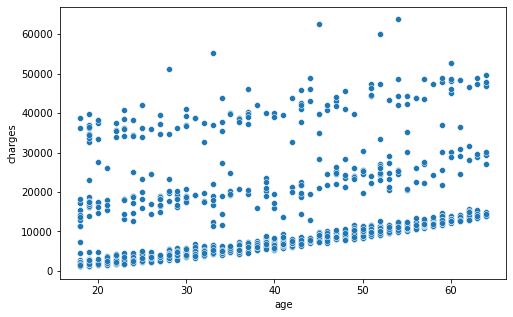

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=df_train)

We could see that age and charges have a positive correlation. To prove this we could test the correlation between those 2 features.

In [8]:
df_train[['age', 'charges']].corr(method='spearman')

,age,charges
age,1.000000,0.534516
charges,0.534516,1.000000


The result above shows that age and charges have medium positive correlation,

### Smoker and Charges

<AxesSubplot:xlabel='charges', ylabel='smoker'>

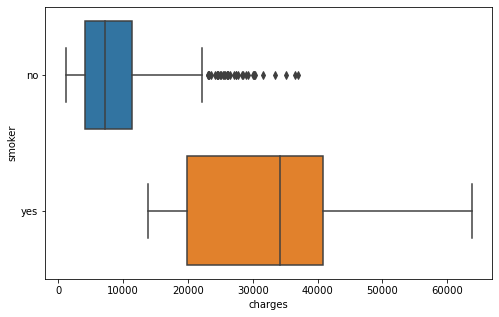

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='charges', y='smoker', data=df_train)

From the boxplot above, client who smokes has higher hospital bill charges than client who doesn't smoke.

<AxesSubplot:xlabel='age', ylabel='charges'>

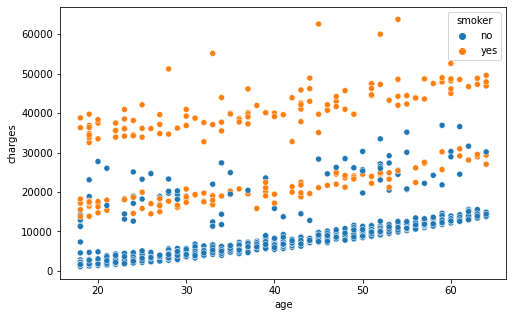

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df_train)

If we combine the age-charges scatterplot with smoker feature, we could see that client who smokes will have a higher hospital bill charges.

### Sex and Charges

<AxesSubplot:xlabel='charges', ylabel='sex'>

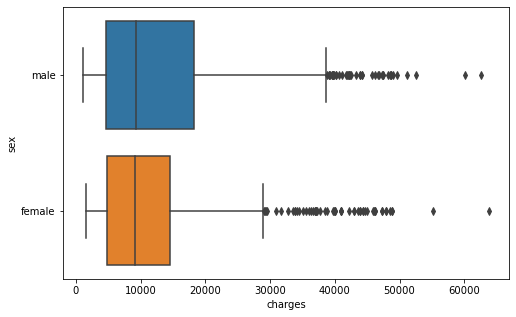

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='charges', y='sex', data=df_train)

From the boxplot above, we could see that male clients have higher hospital bill charges than female clients.

### BMI and Charges

<AxesSubplot:xlabel='charges', ylabel='bmi'>

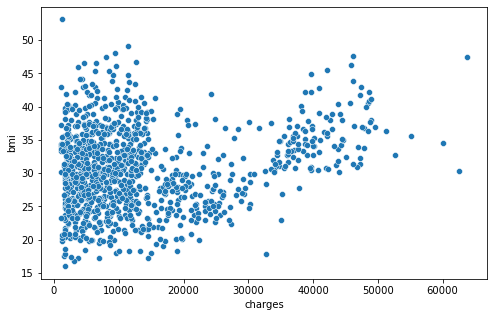

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='charges', y='bmi', data=df_train)

In [13]:
df_train[['bmi', 'charges']].corr(method='spearman')

,bmi,charges
bmi,1.000000,0.123392
charges,0.123392,1.000000


From the scatterplot and correlation coefficient above, we could see a weak correlation between BMI and charges.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

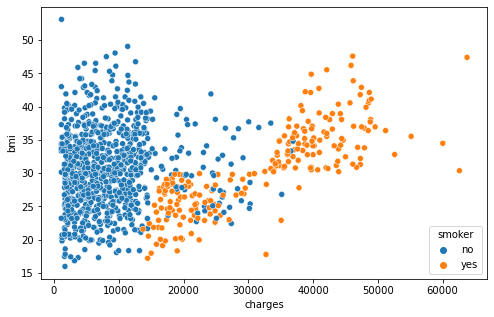

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='charges', y='bmi', hue='smoker', data=df_train)

But, if we split the BMI-charges scatterplot by smoker feature, we could once again see that client who smokes will have a higher hospital bill.

In [15]:
df_train[df_train['smoker'] == 'no'][['bmi', 'charges']].corr(method='spearman')

,bmi,charges
bmi,1.000000,0.116635
charges,0.116635,1.000000


In [16]:
df_train[df_train['smoker'] == 'yes'][['bmi', 'charges']].corr(method='spearman')

,bmi,charges
bmi,1.000000,0.833599
charges,0.833599,1.000000


The correlation coefficient above shows that client who smokes has a very high correlation between BMI and charges.

### Children

Out of curiosity, I will try to explore the children feature.

<AxesSubplot:xlabel='children', ylabel='charges'>

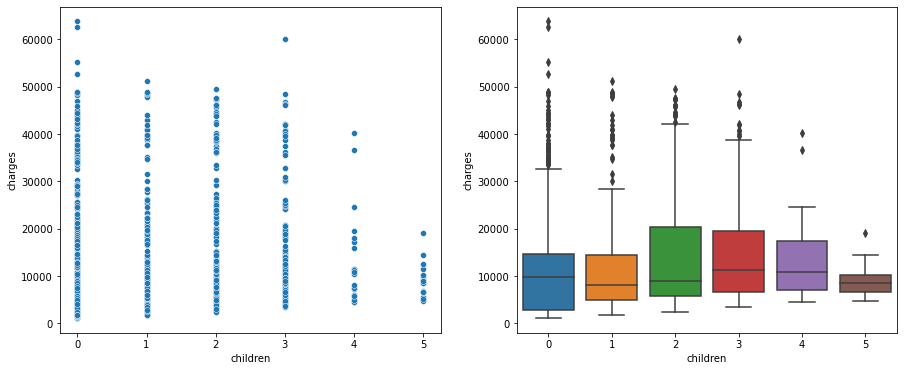

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x='children', y='charges', data=df_train, ax=ax[0])
sns.boxplot(x='children', y='charges', data=df_train, ax=ax[1])

From the plots above, we could see that clients with 4 or 5 children have lower hospital bill.

I tried to group the data based on children and smoker feature. Below is the stacked bar plot.

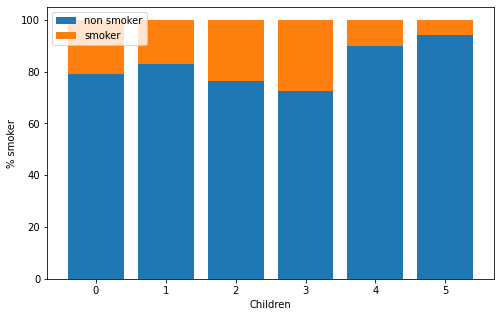

In [18]:
df_smoker_children = pd.DataFrame(df_train.groupby(['children', 'smoker']).count()['age'])
df_smoker_children.rename(columns={'age':'count'}, inplace=True)
df_smoker_children.reset_index(inplace=True)
df_smoker_children = df_smoker_children.pivot_table(index='children', columns='smoker', values='count')
df_smoker_children['pct_no'] = (df_smoker_children['no'] / (df_smoker_children['no'] + df_smoker_children['yes'])) * 100
df_smoker_children['pct_yes'] = 100 - df_smoker_children['pct_no']
df_smoker_children.reset_index(inplace=True)

plt.figure(figsize=(8,5))
plt.bar(x='children', height='pct_no', data=df_smoker_children, label='non smoker', )
plt.bar(x='children', height='pct_yes', data=df_smoker_children, bottom='pct_no', label='smoker')
plt.xlabel('Children')
plt.ylabel('% smoker')
plt.legend()
plt.show()

We could see there are more clients who smoke have less than 4 children. I tried to split the data into client with less than 4 children or not.

<AxesSubplot:xlabel='charges', ylabel='children_less_than_4'>

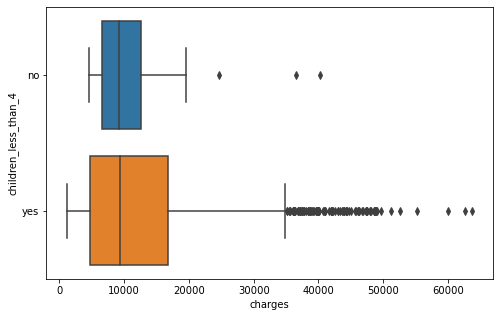

In [19]:
df_train['children_less_than_4'] = df_train['children'].apply(lambda x: 'yes' if x < 4 else 'no')

plt.figure(figsize=(8,5))
sns.boxplot(x='charges', y='children_less_than_4', data=df_train)

Based on the boxplot above, we could see that clients with 4 or 5 children have lower hospital bill charges.

But when I looked into the number of clients with 4 or 5 children, they only covers around 3.46% of the dataset. As the number is really small, I will compare the machine learning model performance where I include and exclude the children feature.

In [20]:
df_train.groupby('children').count()['charges']

children
0    461
1    253
2    196
3    123
4     20
5     17
Name: charges, dtype: int64

## Feature to be used

Based on EDA above, I will use these features:
- age
- sex
- smoker
- bmi
- children_less_than_4 (optional)

Based on the experiments, children_less_than_4 didn't have much effect to the models' performances. The models even performed slightly better without it. So I will exclude it from the list of features used (models below didn't use children_less_than_4 feature).

## To-Do
- divide children feature in test set into < 4 and >= 4
- encode smoker, sex, and children_less_than_4

# Preprocessing

In [21]:
df_test['children_less_than_4'] = df_test['children'].apply(lambda x: 'yes' if x < 4 else 'no')

# Model Training

In [22]:
used_num_cols = ['age', 'bmi']
# used_ctg_cols = ['sex', 'smoker', 'children_less_than_4']
used_ctg_cols = ['sex', 'smoker']

In [23]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# encode categorical features with OneHotEncoder
onehot_encoder = OneHotEncoder(drop='if_binary')
do_nothing = FunctionTransformer()
col_transformer = ColumnTransformer([
    ('encoder', onehot_encoder, used_ctg_cols),
    ('do_nothing', do_nothing, used_num_cols)
])

# define feature and target dataset
X_train = df_train[used_num_cols + used_ctg_cols]
X_test = df_test[used_num_cols + used_ctg_cols]
y_train = df_train['charges']
y_test = df_test['charges']

In [24]:
# define a dataframe to store model's performance
df_model_score = pd.DataFrame(columns=['Model', 'train_R2', 'train_RMSE', 'train_MAE', 'test_R2', 'test_RMSE', 'test_MAE'])

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define a function to measure model's performances (both train and test sets)
def model_eval(estimator, estimator_name, train_feature, train_target, test_feature, test_target):
    # create empty list to store metrics, this will be used to compare the performance of each model
    metric_val = []
    
    # append model's name to metric_val
    metric_val.append(estimator_name)
    
    # fit train set to model
    estimator.fit(train_feature, train_target)
    
    # define metrics to be used for calculating model's performance
    metrics = [r2_score, mean_squared_error, mean_absolute_error]
    
    # predict charges based on training set
    y_train_pred = estimator.predict(train_feature)
    
    # measure model's performances on training set
    for metric in metrics:
        # conditional to get RMSE value
        if metric == mean_squared_error:
            val = np.sqrt(metric(train_target, y_train_pred))
        else:
            val = metric(train_target, y_train_pred)
        metric_val.append(val)
        
    # predict charges based on test set
    y_test_pred = estimator.predict(test_feature)
    
    # measure model's performances on test set
    for metric in metrics:
        if metric == mean_squared_error:
            val = np.sqrt(metric(test_target, y_test_pred))
        else:
            val = metric(test_target, y_test_pred)
        metric_val.append(val)
    
    # append model's performance scores to df_model_score
    df_len = len(df_model_score)
    df_model_score.loc[df_len] = metric_val

## Base Models
For the base model, I will train 3 models as following:
- Linear Regression
- Decision Tree Regressor
- K-Nearest Neighbors Regressor

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# initalize model
lin_reg = LinearRegression()
lin_reg_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('lin_reg', lin_reg)
])

dt = DecisionTreeRegressor()
dt_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('dt', dt)
])

knn = KNeighborsRegressor()
knn_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', knn)
])

base_models = {'Linear Regression': lin_reg_pipeline, 
               'Decision Tree': dt_pipeline,
               'KNN': knn_pipeline}

In [27]:
# loop through base models
for model_name, model in base_models.items():
    model_eval(model, model_name, X_train, y_train, X_test, y_test)

In [28]:
df_model_score

,Model,train_R2,train_RMSE,train_MAE,test_R2,test_RMSE,test_MAE
0,Linear Regression,0.745853,6099.446942,4264.440703,0.752733,6031.632765,4149.468521
1,Decision Tree,0.999345,309.610781,17.641888,0.653665,7138.386788,3660.135711
2,KNN,0.527643,8315.390634,5511.496585,0.168856,11058.339879,7592.800715


## Ensemble Model
For the ensemble model, I will also train 3 models as following:
- Random Forest Regressor
- AdaBoost Regressor
- Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

rf = RandomForestRegressor()
rf_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('rf', rf)
])

ab = AdaBoostRegressor()
ab_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('ab', ab)
])

gb = GradientBoostingRegressor()
gb_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('gb', gb)
])

ensemble_models = {'Random Forest': rf_pipeline,
                   'AdaBoost': ab_pipeline,
                   'Gradient Boosting': gb_pipeline}

In [30]:
# loop through ensemble models
for model_name, model in ensemble_models.items():
    model_eval(model, model_name, X_train, y_train, X_test, y_test)

In [31]:
df_model_score

,Model,train_R2,train_RMSE,train_MAE,test_R2,test_RMSE,test_MAE
0,Linear Regression,0.745853,6099.446942,4264.440703,0.752733,6031.632765,4149.468521
1,Decision Tree,0.999345,309.610781,17.641888,0.653665,7138.386788,3660.135711
2,KNN,0.527643,8315.390634,5511.496585,0.168856,11058.339879,7592.800715
3,Random Forest,0.975585,1890.503854,1022.617372,0.789036,5571.288977,3146.128852
4,AdaBoost,0.839435,4848.116862,3762.728601,0.790148,5556.582224,4220.452803
5,Gradient Boosting,0.898184,3860.598544,2135.704064,0.829726,5005.245441,2785.884479


Based on the results above, the best model is Gradient Boosting. I will try to tune it's hyperparameter.

### Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

gb_param_grid = {
    'gb__learning_rate': [1, 0.1, 0.01],
    'gb__n_estimators': [50, 100, 150],
    'gb__subsample': [0.2, 0.5, 1.0],
    'gb__random_state': [22],
    'gb__max_depth': [3, 5, 10],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 5, 10]
}

gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid
)

gb_grid_search.fit(X_train, y_train)

gb_best = gb_grid_search.best_estimator_

model_eval(gb_best, 'Best Gradient Boosting', X_train, y_train, X_test, y_test)

In [33]:
df_model_score.sort_values(by=['test_R2', 'test_RMSE'], ascending=False)

,Model,train_R2,train_RMSE,train_MAE,test_R2,test_RMSE,test_MAE
6,Best Gradient Boosting,0.881737,4160.763075,2290.203310,0.836282,4907.947197,2714.231193
5,Gradient Boosting,0.898184,3860.598544,2135.704064,0.829726,5005.245441,2785.884479
4,AdaBoost,0.839435,4848.116862,3762.728601,0.790148,5556.582224,4220.452803
3,Random Forest,0.975585,1890.503854,1022.617372,0.789036,5571.288977,3146.128852
0,Linear Regression,0.745853,6099.446942,4264.440703,0.752733,6031.632765,4149.468521
1,Decision Tree,0.999345,309.610781,17.641888,0.653665,7138.386788,3660.135711
2,KNN,0.527643,8315.390634,5511.496585,0.168856,11058.339879,7592.800715


The tuned gradient boosting model has the best performance compared to the other models.

In [34]:
# best parameters of Gradient Boosting
gb_grid_search.best_params_

{'gb__learning_rate': 0.1,
 'gb__max_depth': 3,
 'gb__min_samples_leaf': 5,
 'gb__min_samples_split': 2,
 'gb__n_estimators': 50,
 'gb__random_state': 22,
 'gb__subsample': 1.0}

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:xlabel='feature_importances', ylabel='feature_names'>

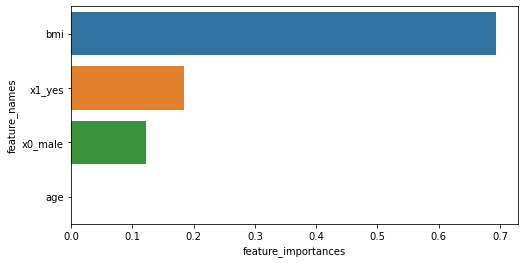

In [35]:
# get feature importances
gb_feature_importances = gb_best.steps[1][1].feature_importances_

# get onehot encoded feature names
ctg_onehot = onehot_encoder.fit_transform(X_train[used_ctg_cols])
feature_names = np.concatenate((used_num_cols, onehot_encoder.get_feature_names()))

# create dataframe to store feature importances
d = {'feature_names': feature_names, 'feature_importances': gb_feature_importances}
df_feature_importances = pd.DataFrame(data=d)

# plot feature importances
plt.figure(figsize=(8,4))
sns.barplot(x='feature_importances', y='feature_names', data=df_feature_importances, order=df_feature_importances.sort_values(by='feature_importances', ascending=False)['feature_names'])

The feature age seems to have least importance to our gradient boosting model. I've tried to remove the age feature but it dropped the performance quite significantly.

<AxesSubplot:title={'center':'Test Set Residual Plot'}, xlabel='charges', ylabel='charges_pred'>

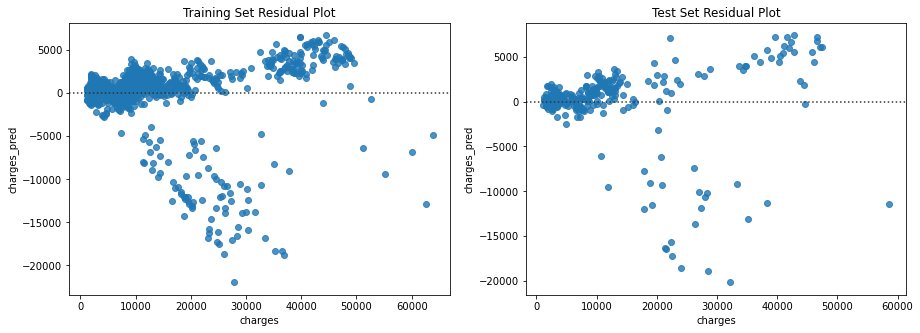

In [36]:
# plotting the residual plot
y_train_pred = gb_best.predict(X_train)
y_test_pred = gb_best.predict(X_test)
df_train['charges_pred'] = y_train_pred
df_test['charges_pred'] = y_test_pred

# residual plot of train and test set
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].title.set_text('Training Set Residual Plot')
sns.residplot(x='charges', y='charges_pred', data=df_train, ax=ax[0])
ax[1].title.set_text('Test Set Residual Plot')
sns.residplot(x='charges', y='charges_pred', data=df_test, ax=ax[1])

# Conclussion

Based on the models tested above, we get the best model to be the hyperparameter-tuned Gradient Boosting. It achieved a R2 score of 0.88 on training set and 0.84 on test set, and RMSE score of 4,160.76 on training set and 4,907.95 on test set.